# Logistic Regression with Python

## 1. Logistic Regression

### 1.1. Import libraries

In [1]:
import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt

### 1.2. Load data

In [2]:
DATA_FILE = "w3/ex2data1.txt"

In [3]:
data = np.loadtxt(DATA_FILE, delimiter=",")
data[:5,:]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [4]:
X = data[:,:2]  # exam scores
Y = data[:,2]  # admission decision

### 1.3. Explorer data

In [5]:
print("number of samples = %s" % X.shape[0])

number of samples = 100


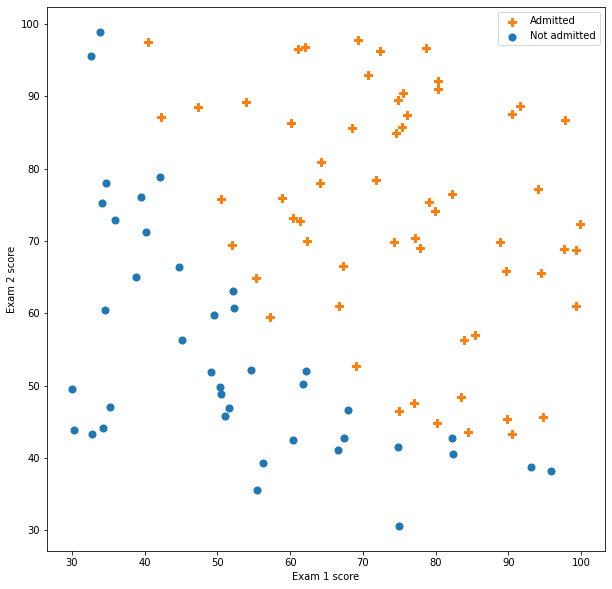

In [6]:
scale = 50

fig = plt.figure(figsize=(10,10))
plt.scatter(X[Y==1,0], X[Y==1,1], label="Admitted", s=scale, marker="P", c="#ff7f0e")
plt.scatter(X[Y==0,0], X[Y==0,1], label="Not admitted", s=scale, marker="o", c="#1f77b4")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

### 1.4. Define functions

In [7]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def estimate(w, X):
    Z = np.matmul(X, w)
    Yh = sigmoid(Z)
    return Yh

def cost_func(w, X, Y):
    Yh = estimate(w, X)
    c0 = -np.matmul(Y.T, np.log(Yh))
    c1 = -np.matmul((1-Y).T, np.log(1-Yh))
    cost = (c0 + c1)/len(X)
    return cost

def gradient(w, X, Y):
    Yh = estimate(w, X)
    D = Yh - Y
    grad = np.matmul(X.T, D)/len(X)
    return grad

def predict(w, X):
    Yh = estimate(w, X)
    P = np.array([1. if p >= 0.5 else 0. for p in Yh])
    return P

### 1.5. Prepare data

In [8]:
X = np.column_stack((np.ones(X.shape[0]), X))

### 1.6. Training

In [9]:
w = np.zeros(X.shape[1])  # initialize weights
w_opt, _, _ = opt.fmin_tnc(func=cost_func, x0=w, fprime=gradient, args=(X, Y))

In [10]:
cost = cost_func(w_opt, X, Y)
round(cost, 3)

0.203

In [11]:
Xt = np.array([1, 45, 85])
Yh = estimate(w_opt, Xt)
round(Yh, 3)

0.776

### 1.7. Evaluate

In [12]:
P = predict(w_opt, X)
acc = np.sum(P==Y)/len(Y)*100
print("accuracy = {}%".format(acc))

accuracy = 89.0%


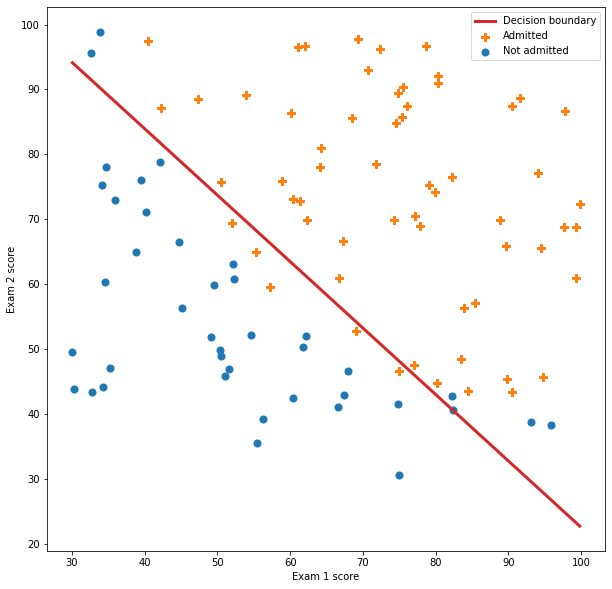

In [13]:
Xd = np.array([np.min(X[:,1]), np.max(X[:,1])])
Yd = (Xd*w_opt[1]+w_opt[0])/(-w_opt[2])
scale = 50

fig = plt.figure(figsize=(10,10))
plt.scatter(X[Y==1,1], X[Y==1,2], label="Admitted", s=scale, marker="P", c="#ff7f0e")
plt.scatter(X[Y==0,1], X[Y==0,2], label="Not admitted", s=scale, marker="o", c="#1f77b4")
plt.plot(Xd, Yd, label="Decision boundary", linewidth=3, color="#d62728")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()